In [1]:
import os
import torch
from torch import nn
from torchvision.transforms import v2
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from helpers import get_files_in_dir
from torchvision.io import read_image




In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [3]:
class tit(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(3, 5, 5, stride=5, padding=0)
        self.re0 = nn.ReLU()
        self.l1  = nn.Linear(5*20*20, 100, bias=True)
        self.re1 = nn.ReLU()
        self.l2  = nn.Linear(100, 5, bias=True)
        self.re2 = nn.ReLU()


        #self.linear_relu_stack = nn.Sequential(
        #    nn.Linear(5, 5, bias=True),
            #nn.Linear(5, 5, bias=True),
            #nn.ReLU(),
            #nn.ReLU()
        #)

    def forward(self, x):
        x = self.c1(x)        
        x = self.re0(x)
        x = torch.flatten(x, 1)
        x = self.l1(x)
        x = self.re1(x)
        x = self.l2(x)
        x = self.re2(x)
        
        return x

In [4]:
from figures_dataset import FiguresData
train_dataset = FiguresData(100,2500)
print("Training ponits: ",len(train_dataset))

valid_dataset = FiguresData(100,100)
print("Validation ponits: ",len(valid_dataset))


c:\Users\newma\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


Training ponits:  1000
Validation ponits:  40


tensor(0)


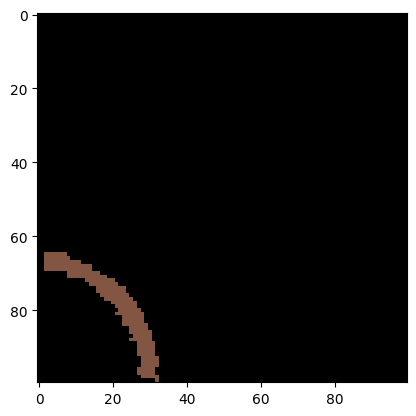

tensor(1)


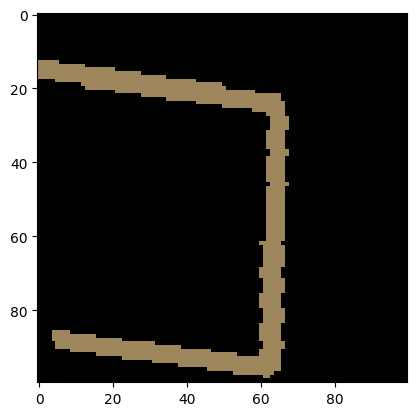

tensor(0)


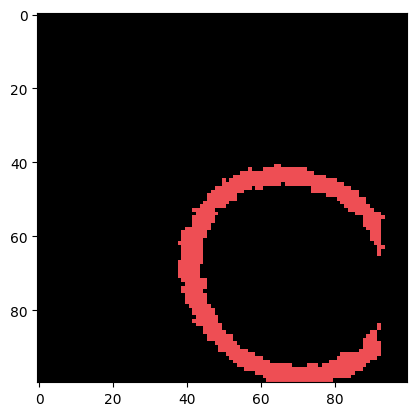

tensor(1)


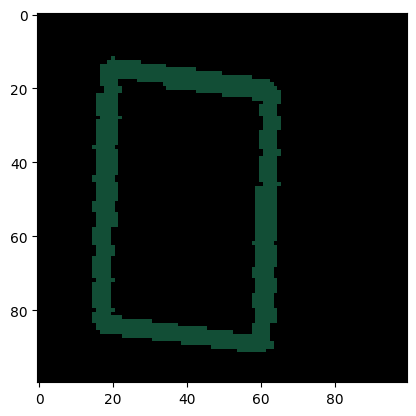

tensor(0)


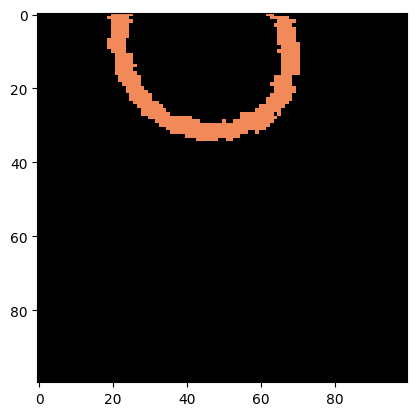

In [5]:
#terate training_set and visualize 
for i in range(5):
    print(train_dataset[i][1])
    plt.imshow(train_dataset[i][0].permute(1, 2, 0))
    plt.show()

In [6]:
# TRAINING IMPORTS
from torch import nn
import torch.optim as optim
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from torcheval.metrics.functional import multiclass_accuracy
from torch.nn import CrossEntropyLoss

In [ ]:
# TRAINING LOOP
model = tit().to(device)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=True)
ps = 0
for name, param in model.named_parameters():
    #print(f"Layer: {name} | Size: {param.size()} \n")
    param.requires_grad_ = True
    ps += param.numel()
    

training_data = None 

epochs = 41

optimizer = optim.AdamW(model.parameters(), lr=0.01, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.1, amsgrad=False)
optimizer.zero_grad()
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.2) #learning rate decay
criterion = CrossEntropyLoss()
iter_num = 0

lowest_loss = 999
valid_loss = 900
best_epoch = 0

epoch_pbar = tqdm(range(epochs))

print("Params to train: ",ps)

for epoch in epoch_pbar:
    print('Epoch num {}'.format(epoch))
    model.train()
    train_loss = 0

    #batch_pbar = enumerate(tqdm(train_loader))
    #for i,batch in batch_pbar:
    for i, batch in zip(range(len(train_loader)),train_loader):
        images, labels = batch
        images = images.to(torch.float32)
        images = images.to(device)
        labels = labels.to(device)
        pred = model(images)

        loss =  criterion(pred,labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad(set_to_none=True)

        train_loss += loss.item()
        iter_num+=1

    train_loss /= (i+1)

    if (epoch == 0) or (epoch > 10 and epoch % 5 == 0):
        model.eval()
        valid_loss = 0
        valid_accuracy = 0
        with torch.no_grad():
            for i, batch in zip(range(len(valid_loader)),valid_loader):
                images, labels = batch
                images = images.to(torch.float32)
                images = images.to(device)
                labels = labels.to(device)
                pred = model(images)

                loss =  criterion(pred,labels)
                valid_loss += loss.item()
                valid_accuracy += multiclass_accuracy(pred, labels)

        valid_loss /= (i+1)
        valid_accuracy /= (i+1)
        print('Validation loss {} | Validation accuracy {}'.format(round(valid_loss, 4), round(valid_accuracy.item(), 4)))

    print('Epoch num {}| train loss {} | lr_opt {} \n'.format(epoch,round(train_loss, 4),optimizer.param_groups[0]['lr']))

    if(epoch == 0):
        lowest_loss = valid_loss
    

    if (valid_loss + 0.01) < lowest_loss:
        lowest_loss = valid_loss
        best_epoch = epoch
        #print('New lowest loss: {} at epoch {}'.format(round(lowest_loss, 4), best_epoch))
    
    elif epoch>15 and epoch - best_epoch > 5:
        print('Early stopping at epoch {}. Best epoch: {} with score {} '.format(epoch, best_epoch, lowest_loss))
        break 

    
    scheduler.step()



  0%|          | 0/64 [00:00<?, ?it/s]

Params to train:  200985
Epoch num 0
Validation loss 1.3718 | Validation accuracy 0.5938
Epoch num 0| train loss 1.3997 | lr_opt 0.01 

Epoch num 1
Epoch num 1| train loss 1.314 | lr_opt 0.01 

Epoch num 2
Epoch num 2| train loss 0.7623 | lr_opt 0.01 

Epoch num 3
Epoch num 3| train loss 0.4339 | lr_opt 0.01 

Epoch num 4
Epoch num 4| train loss 0.2347 | lr_opt 0.01 

Epoch num 5
Epoch num 5| train loss 0.1042 | lr_opt 0.01 

Epoch num 6
Epoch num 6| train loss 0.0544 | lr_opt 0.01 

Epoch num 7
Epoch num 7| train loss 0.0506 | lr_opt 0.01 

Epoch num 8
Epoch num 8| train loss 0.0283 | lr_opt 0.01 

Epoch num 9
Epoch num 9| train loss 0.021 | lr_opt 0.01 

Epoch num 10
Epoch num 10| train loss 0.0178 | lr_opt 0.002 

Epoch num 11
Epoch num 11| train loss 0.0164 | lr_opt 0.002 

Epoch num 12
Epoch num 12| train loss 0.0162 | lr_opt 0.002 

Epoch num 13
Epoch num 13| train loss 0.0159 | lr_opt 0.002 

Epoch num 14
Epoch num 14| train loss 0.0156 | lr_opt 0.002 

Epoch num 15
Validation l

In [24]:
del(model)

1117.0


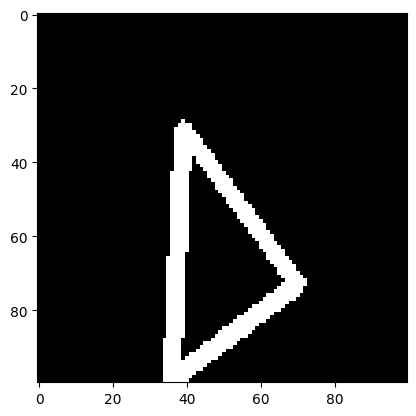

In [2]:
# generate random triangle
from helpers import draw_random_triangle
triangle = draw_random_triangle(100,(1,5))
# visualize triangle
plt.imshow(triangle)

In [27]:
c = nn.Conv2d(3, 3, 5, stride=5, padding=0)

triangle_tensor = torch.tensor(triangle).permute(2, 0, 1).unsqueeze(0).float()
triangle_tensor = c(triangle_tensor)
triangle_tensor = triangle_tensor.squeeze(0)
#triangle_tensor = triangle_tensor.permute(1, 2, 0)
#plt.imshow(triangle_tensor.detach().numpy())
triangle_tensor.shape

torch.Size([3, 20, 20])

In [30]:
# from 3x100x100 to 3x20x20
c1 = nn.Conv2d(3, 30, 5, stride=5, padding=0)
l1  = nn.Linear(30*20*20, 5, bias=True)
re1 = nn.ReLU()

triangle_tensor = torch.tensor(triangle).permute(2, 0, 1).unsqueeze(0).float()
triangle_tensor = c1(triangle_tensor)
print(triangle_tensor.shape)
triangle_tensor = l1(triangle_tensor.flatten())
print(triangle_tensor.shape)
triangle_tensor = re1(triangle_tensor)
triangle_tensor.shape


torch.Size([1, 30, 20, 20])
torch.Size([5])


torch.Size([5])

array([[0., 0., 0., 0., 0.]], dtype=float32)

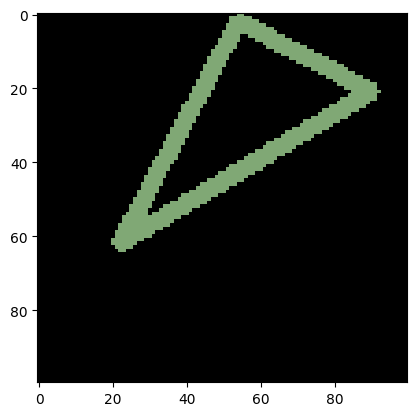

In [15]:
# make random triangle
from helpers import draw_random_triangle
model.cpu()
triangle = draw_random_triangle(100,(1,5))
# visualize triangle
plt.imshow(triangle)
# use model to predict triangle
triangle_tensor = torch.tensor(triangle).permute(2, 0, 1).unsqueeze(0).float()
with torch.no_grad():
    triangle_tensor = model(triangle_tensor)
triangle_tensor = triangle_tensor.detach().numpy()
triangle_tensor